In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
#read into a data frame the data
moviesdf = pd.read_csv("./movies.csv",na_values='NA', keep_default_na=False , encoding = "ISO-8859-1")

### Ejercicio 1

Resumen de los datos

In [8]:
import pandas as pd

# Suponiendo que ya tienes cargado tu DataFrame llamado moviesdf

# Obtener información general sobre el DataFrame
data_summary = moviesdf.info()

# Contar los valores nulos en cada columna
missing_values = moviesdf.isnull().sum()

# Obtener estadísticas descriptivas para columnas numéricas
numeric_summary = moviesdf.describe()

# Mostrar la información general
print(data_summary)

# Mostrar la cantidad de valores nulos en cada columna
print("\nCantidad de valores nulos en cada columna:")
print(missing_values)

# Mostrar el resumen de estadísticas descriptivas para columnas numéricas
print("\nResumen de estadísticas descriptivas para columnas numéricas:")
print(numeric_summary)


<class 'pandas.core.frame.DataFrame'>
Index: 9838 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         9838 non-null   int64  
 1   budget                     9838 non-null   int64  
 2   genres                     9838 non-null   object 
 3   homePage                   4168 non-null   object 
 4   productionCompany          9838 non-null   object 
 5   productionCompanyCountry   9590 non-null   object 
 6   productionCountry          9838 non-null   object 
 7   revenue                    9838 non-null   float64
 8   runtime                    9838 non-null   int64  
 9   video                      9359 non-null   object 
 10  director                   9838 non-null   object 
 11  actors                     9838 non-null   object 
 12  actorsPopularity           9838 non-null   object 
 13  actorsCharacter            9838 non-null   object 
 1

### Ejercicio 4

##responder las pregunas

In [3]:
moviesdf['budget'] = pd.to_numeric(moviesdf['budget'], errors='coerce')
top_budget_movies = moviesdf.sort_values(by="budget", ascending=False, na_position="last")
top_10_budget_movies = top_budget_movies[['title', 'budget']].head(10)
print(top_10_budget_movies)



                                            title     budget
716   Pirates of the Caribbean: On Stranger Tides  380000000
4710                      Avengers: Age of Ultron  365000000
5952                            Avengers: Endgame  356000000
4953                               Justice League  300000000
5953                       Avengers: Infinity War  300000000
163      Pirates of the Caribbean: At World's End  300000000
607                              Superman Returns  270000000
7134                                The Lion King  260000000
3791                                      Tangled  260000000
280                                  Spider-Man 3  258000000


Ejercicio 4.2

In [4]:
moviesdf['revenue'] = pd.to_numeric(moviesdf['revenue'], errors='coerce')
top_revenue_movies = moviesdf.sort_values(by="revenue", ascending=False, na_position="last")
top_10_revenue_movies = top_revenue_movies[['title', 'revenue']].head(10)
print(top_10_revenue_movies)


                             title       revenue
3210                        Avatar  2.847246e+09
5952             Avengers: Endgame  2.797801e+09
307                        Titanic  2.187464e+09
4947  Star Wars: The Force Awakens  2.068224e+09
5953        Avengers: Infinity War  2.046240e+09
4914                Jurassic World  1.671713e+09
7134                 The Lion King  1.667635e+09
9049       Spider-Man: No Way Home  1.631853e+09
3397                  The Avengers  1.518816e+09
5087                     Furious 7  1.515048e+09


Ejercicio 4.3

In [5]:
moviesdf['voteCount'] = pd.to_numeric(moviesdf['voteCount'], errors='coerce')
top_voted_movie = moviesdf.sort_values(by="voteCount", ascending=False, na_position="last")
top_voted_movie = top_voted_movie[['title', 'voteCount']].head(1)
print(top_voted_movie)

          title  voteCount
3511  Inception      30788


Ejercicico 4.4

In [6]:
moviesdf['voteAvg'] = pd.to_numeric(moviesdf['voteAvg'], errors='coerce')
moviesdf['voteCount'] = pd.to_numeric(moviesdf['voteCount'], errors='coerce')
pelisfiltradas = moviesdf[moviesdf['voteCount'] > 1000]#es para que la calidad de los datos sea significativa
peorcalificada = pelisfiltradas.sort_values(by="voteAvg", ascending=True)
peorcalificada = peorcalificada[['title', 'voteAvg', 'voteCount']].head(1)
print(peorcalificada)


                     title  voteAvg  voteCount
2766  Dragonball Evolution      2.8       1600


Ejercicio 4.5

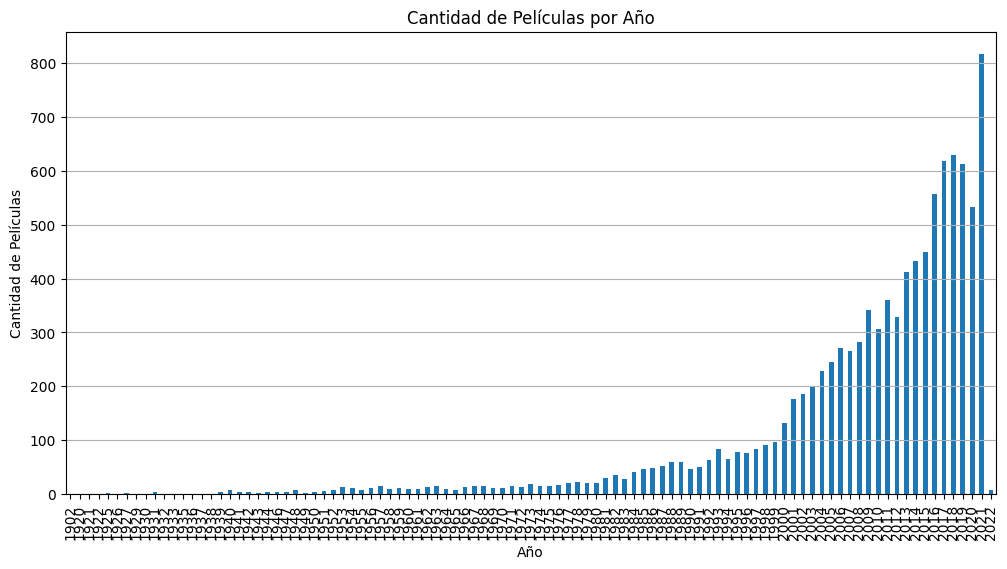

(2021, 816)

In [9]:
# formato de date
moviesdf['releaseDate'] = pd.to_datetime(moviesdf['releaseDate'], errors='coerce')

# Para obtener el año y la fecha de lanzamiento 
moviesdf['year'] = moviesdf['releaseDate'].dt.year
pd.set_option('display.max_rows', None)

# Contar películas por año
pelispora = moviesdf['year'].value_counts().sort_index()
maspelis = pelispora.idxmax()
maspelis_contador = pelispora.max()

# Imprimir cuántas películas se hicieron cada año
print("Number of movies every year :")
print(pelispora)
print("\nYear with more movies:")
print(f"year: {maspelis}, movies: {maspelis_contador}")
#gráfico de barras
plt.figure(figsize=(12, 6))
pelispora.plot(kind='bar')
plt.title('Cantidad de Películas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Películas')
plt.grid(axis='y')
plt.show()

maspelis, maspelis_contador






Ejercicio 4.6

In [ ]:
if 'genres_list' not in moviesdf.columns:
    moviesdf['genres_list'] = moviesdf['genres'].str.split('|')


most_recent_movies = moviesdf.sort_values(by='releaseDate', ascending=False).head(20)
most_recent_movies_clean = most_recent_movies.dropna(subset=['genres_list'])

# Contando la frecuencia de géneros en las 20 películas más recientes
recent_genre_counts_clean = Counter(genre for genres in most_recent_movies_clean['genres_list'] for genre in genres)

# Limpieza de datos para todo el conjunto de películas
all_movies_clean = moviesdf.dropna(subset=['genres_list'])

# Contando la frecuencia de géneros en todo el conjunto de datos
overall_genre_counts_clean = Counter(genre for genres in all_movies_clean['genres_list'] for genre in genres)

# Gráfico para las 20 películas más recientes
plt.figure(figsize=(10, 5))
plt.bar(recent_genre_counts_clean.keys(), recent_genre_counts_clean.values(), color='blue')
plt.title('Frecuencia de Géneros en las 20 Películas Más Recientes')
plt.xlabel('Géneros')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Gráfico para todo el conjunto de datos
plt.figure(figsize=(10, 5))
plt.bar(overall_genre_counts_clean.keys(), overall_genre_counts_clean.values(), color='green')
plt.title('Frecuencia de Géneros en Todo el Conjunto de Datos')
plt.xlabel('Géneros')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()





Ejercicio 4.7

In [ ]:

moviesdf = pd.read_csv('movies.csv', encoding="ISO-8859-1", na_values='NA', keep_default_na=False)
moviesdf['genres_list'] = moviesdf['genres'].str.split('|')
moviesdf['profit'] = moviesdf['revenue'] - moviesdf['budget']


expanded_genres_df = moviesdf.explode('genres_list')
expanded_genres_df.rename(columns={'genres_list': 'genre'}, inplace=True)


genre_profit_sums = expanded_genres_df.groupby('genre')['profit'].sum()
sorted_genres_by_profit = genre_profit_sums.sort_values(ascending=False)


print("Genero principal con mayores ganancias:", sorted_genres_by_profit.idxmax(), 
      "con una ganancia total de:", sorted_genres_by_profit.max())

#end


### 4.8


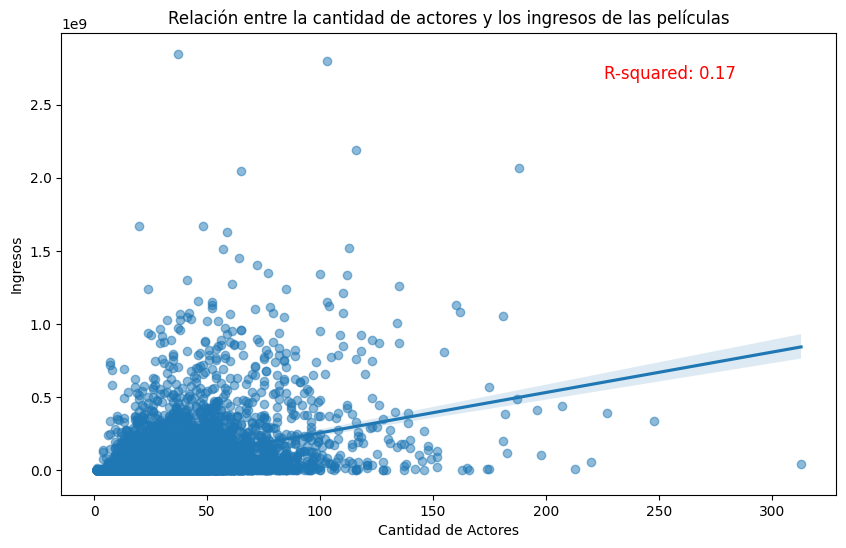

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

plt.figure(figsize=(10, 6))

# Clean the data: Ensure 'actorsAmount' is numeric and not 0
moviesdf_clean = moviesdf.loc[moviesdf["actorsAmount"].apply(lambda x: isinstance(x, (int, float)) and x != 0)]

# Plot the regression line
sns.regplot(x='actorsAmount', y='revenue', data=moviesdf_clean, scatter_kws={'alpha': 0.5})

# Calculate the correlation coefficient (Pearson's r) and R-squared
correlation_coefficient, _ = pearsonr(moviesdf_clean['actorsAmount'], moviesdf_clean['revenue'])
r_squared = correlation_coefficient**2

# Display the R-squared value on the plot
plt.text(0.7, 0.9, f'R-squared: {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')

plt.title('Relación entre la cantidad de actores y los ingresos de las películas')
plt.xlabel('Cantidad de Actores')
plt.ylabel('Ingresos')

plt.show()



C:\Users\inmar\AppData\Local\Temp\ipykernel_27612\440447021.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviesdf_clean['releaseDate'] = pd.to_datetime(moviesdf_clean['releaseDate'], errors='coerce')


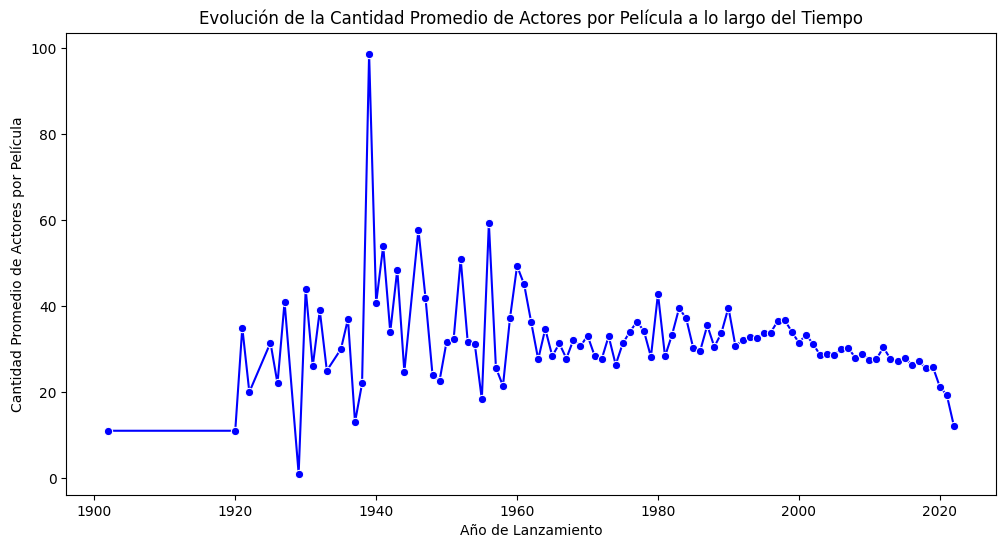

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Limpiar la data: Asegurar que 'actorsAmount' es numérico y no es 0
moviesdf_clean = moviesdf.loc[moviesdf["actorsAmount"].apply(lambda x: isinstance(x, (int, float)) and x != 0)]

# Convertir la columna 'releaseDate' a tipo datetime para trabajar con fechas
moviesdf_clean['releaseDate'] = pd.to_datetime(moviesdf_clean['releaseDate'], errors='coerce')

# Agrupar por año y calcular la cantidad promedio de actores por película en ese año
average_actors_by_year = moviesdf_clean.groupby(moviesdf_clean['releaseDate'].dt.year)['actorsAmount'].mean()

# Crear un gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_actors_by_year.index, y=average_actors_by_year.values, marker='o', color='blue')

# Añadir etiquetas y título
plt.title('Evolución de la Cantidad Promedio de Actores por Película a lo largo del Tiempo')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad Promedio de Actores por Película')

plt.show()


### Ejercicio 4.9

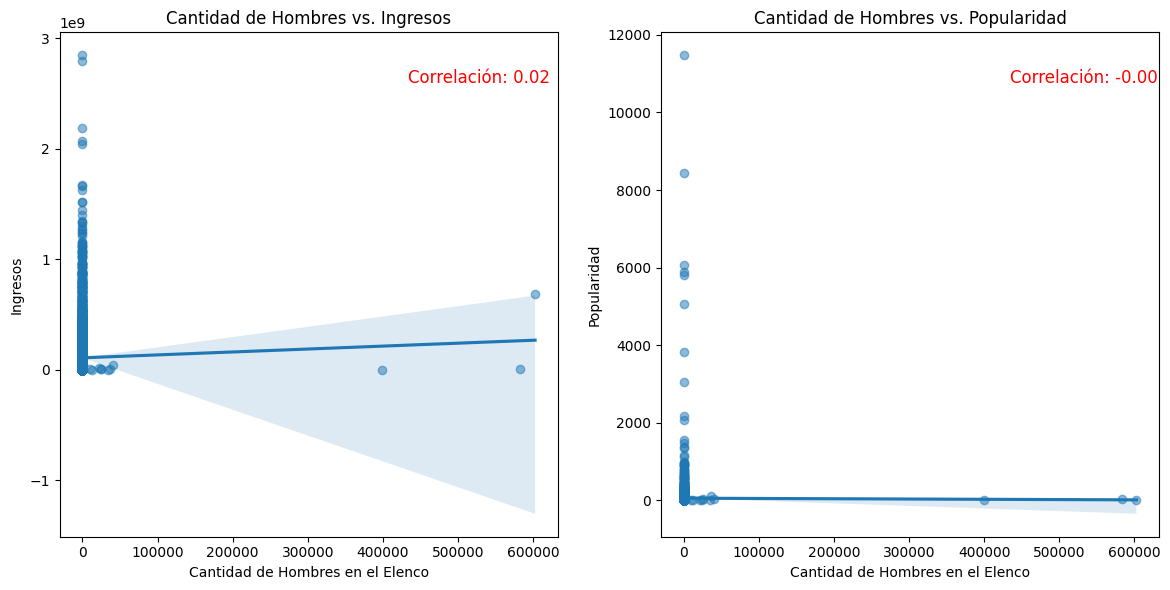

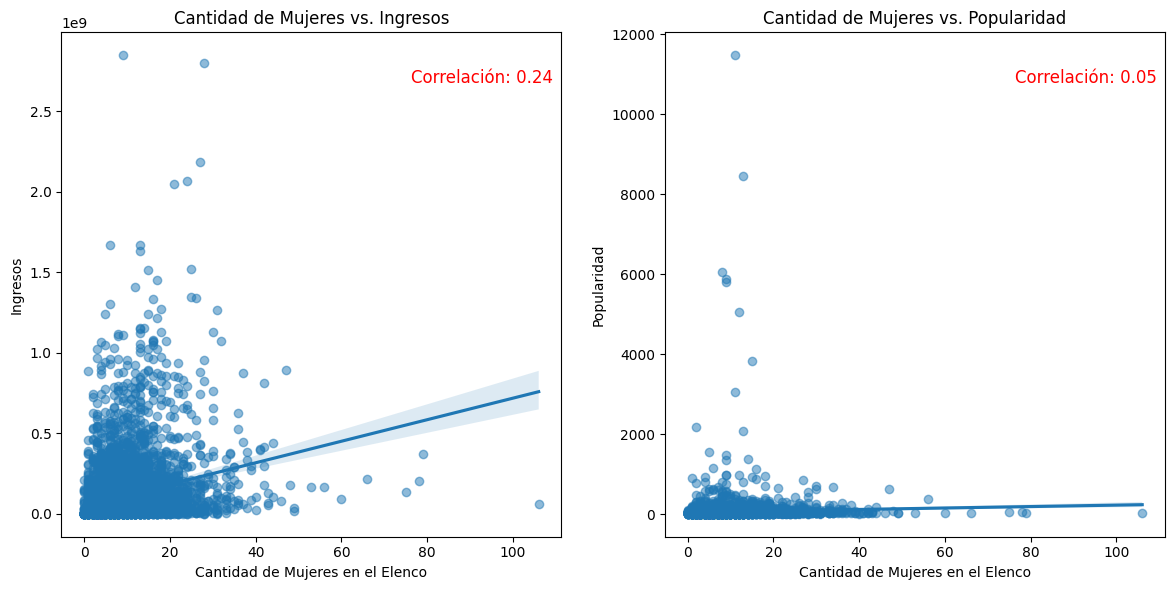

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Suponiendo que ya tienes cargado tu DataFrame llamado moviesdf

# Limpiar la data: Asegurar que 'castWomenAmount' y 'castMenAmount' son numéricos y mayores que 0
moviesdf_clean = moviesdf.loc[
    (moviesdf["castWomenAmount"].apply(lambda x: x.isdigit())) &
    (moviesdf["castMenAmount"].apply(lambda x: x.isdigit()))
]

# Asegurar que los ingresos sean mayores que 0 y numéricos
moviesdf_clean = moviesdf_clean[moviesdf_clean["revenue"].apply(lambda x: isinstance(x, (int, float)) and x > 0)]

# Convertir columnas a tipos numéricos
moviesdf_clean["castMenAmount"] = pd.to_numeric(moviesdf_clean["castMenAmount"])
moviesdf_clean["castWomenAmount"] = pd.to_numeric(moviesdf_clean["castWomenAmount"])
moviesdf_clean["revenue"] = pd.to_numeric(moviesdf_clean["revenue"])
moviesdf_clean["popularity"] = pd.to_numeric(moviesdf_clean["popularity"])


# Scatter plot y correlación para cantidad de hombres vs. ingresos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='castMenAmount', y='revenue', data=moviesdf_clean, scatter_kws={'alpha': 0.5})
plt.title('Cantidad de Hombres vs. Ingresos')
plt.xlabel('Cantidad de Hombres en el Elenco')
plt.ylabel('Ingresos')

# Calcular la correlación entre cantidad de hombres y ingresos
correlation_men_revenue, _ = pearsonr(moviesdf_clean['castMenAmount'], moviesdf_clean['revenue'])
plt.text(0.7, 0.9, f'Correlación: {correlation_men_revenue:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')

# Scatter plot y correlación para cantidad de hombres vs. popularidad
plt.subplot(1, 2, 2)
sns.regplot(x='castMenAmount', y='popularity', data=moviesdf_clean, scatter_kws={'alpha': 0.5})
plt.title('Cantidad de Hombres vs. Popularidad')
plt.xlabel('Cantidad de Hombres en el Elenco')
plt.ylabel('Popularidad')

# Calcular la correlación entre cantidad de hombres y popularidad
correlation_men_popularity, _ = pearsonr(moviesdf_clean['castMenAmount'], moviesdf_clean['popularity'])
plt.text(0.7, 0.9, f'Correlación: {correlation_men_popularity:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')

plt.tight_layout()
plt.show()

# Scatter plot y correlación para cantidad de mujeres vs. ingresos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='castWomenAmount', y='revenue', data=moviesdf_clean, scatter_kws={'alpha': 0.5})
plt.title('Cantidad de Mujeres vs. Ingresos')
plt.xlabel('Cantidad de Mujeres en el Elenco')
plt.ylabel('Ingresos')

# Calcular la correlación entre cantidad de mujeres y ingresos
correlation_women_revenue, _ = pearsonr(moviesdf_clean['castWomenAmount'], moviesdf_clean['revenue'])
plt.text(0.7, 0.9, f'Correlación: {correlation_women_revenue:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')

# Scatter plot y correlación para cantidad de mujeres vs. popularidad
plt.subplot(1, 2, 2)
sns.regplot(x='castWomenAmount', y='popularity', data=moviesdf_clean, scatter_kws={'alpha': 0.5})
plt.title('Cantidad de Mujeres vs. Popularidad')
plt.xlabel('Cantidad de Mujeres en el Elenco')
plt.ylabel('Popularidad')

# Calcular la correlación entre cantidad de mujeres y popularidad
correlation_women_popularity, _ = pearsonr(moviesdf_clean['castWomenAmount'], moviesdf_clean['popularity'])
plt.text(0.7, 0.9, f'Correlación: {correlation_women_popularity:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')

plt.tight_layout()
plt.show()


### Ejercicio 4.10

In [40]:
import pandas as pd


#ignorar las peliculas sin directores
top_rated_movies = moviesdf.loc[moviesdf["director"] != '']

# Ordenar las películas por la calificación promedio en orden descendente

top_rated_movies = top_rated_movies.sort_values(by='voteAvg', ascending=False).head(20)



# Eliminar espacios en blanco alrededor del delimitador '|', separar los directores y expandirlos en nuevas filas
directors_split = top_rated_movies['director'].str.strip().str.split('|', expand=True).stack().reset_index(level=1, drop=True)

# Contar la frecuencia de cada director
director_counts = directors_split.value_counts()

print("Los directores principales de las 20 películas mejor calificadas:")
print(director_counts)



Los directores principales de las 20 películas mejor calificadas:
Haruo Sotozaki            2
Park Jun-soo              2
Rebecca Sugar             1
Filip Ghiorghi            1
Ulises Valencia           1
Igor Kopylov              1
Min Yoon-gi               1
Kim Seok-jin              1
Jung Ho-seok              1
Park Ji-min               1
Kim Tae-hyung             1
Jeon Jung-kook            1
Kim Nam-joon              1
Selena Quintanilla        1
Kaku Arakawa              1
Samuel Leong              1
Won Myeong-jun            1
Victor Cook               1
Troy Adomitis             1
Dave Bullock              1
Christin Baker            1
Juan Olivares             1
Víctor Barba              1
Miguel Angel Zavala       1
Laurent Bouzereau         1
Thomas Coven              1
Preston A. Whitmore II    1
Name: count, dtype: int64


### Ejercicio 4.11

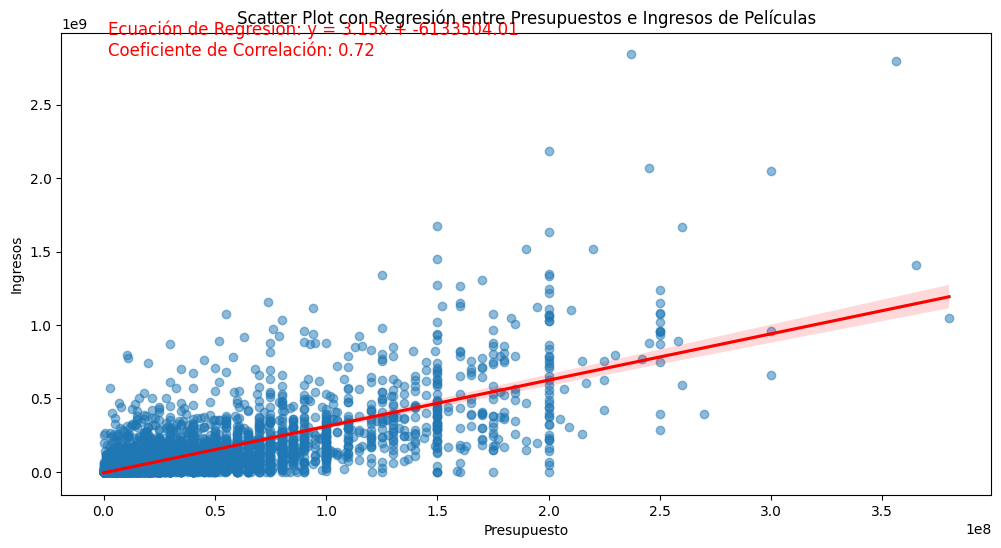

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Suponiendo que ya tienes cargado tu DataFrame llamado moviesdf

# Eliminar filas con valores nulos en 'budget' y 'revenue'
moviesdf_clean = moviesdf.dropna(subset=['budget', 'revenue'])

# Convertir valores en formato científico a formato decimal
moviesdf_clean['budget'] = moviesdf_clean['budget'].apply(lambda x: float(x))
moviesdf_clean['revenue'] = moviesdf_clean['revenue'].apply(lambda x: float(x))

# Eliminar filas con valores 0's en 'budget'
moviesdf_clean = moviesdf_clean[moviesdf_clean['budget'] > 0]

# Calcular la ecuación de regresión lineal sin transformación logarítmica
X = moviesdf_clean['budget'].values.reshape(-1, 1)
y = moviesdf_clean['revenue'].values

model = LinearRegression().fit(X, y)

# Obtener los coeficientes de la regresión
slope = model.coef_[0]
intercept = model.intercept_

# Visualizar un scatter plot con línea de regresión
plt.figure(figsize=(12, 6))
sns.regplot(x='budget', y='revenue', data=moviesdf_clean, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Calcular el coeficiente de correlación (Pearson's r) en los datos sin transformación logarítmica
correlation_coefficient, _ = pearsonr(moviesdf_clean['budget'], moviesdf_clean['revenue'])

# Mostrar el coeficiente de correlación y la ecuación de regresión en el gráfico
equation_text = f'Ecuación de Regresión: y = {slope:.2f}x + {intercept:.2f}\nCoeficiente de Correlación: {correlation_coefficient:.2f}'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, color='red')

plt.title('Scatter Plot con Regresión entre Presupuestos e Ingresos de Películas')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.show()


### 4.12

C:\Users\inmar\AppData\Local\Temp\ipykernel_27612\2950407966.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_revenue_by_month.index, y=average_revenue_by_month.values, palette="viridis")


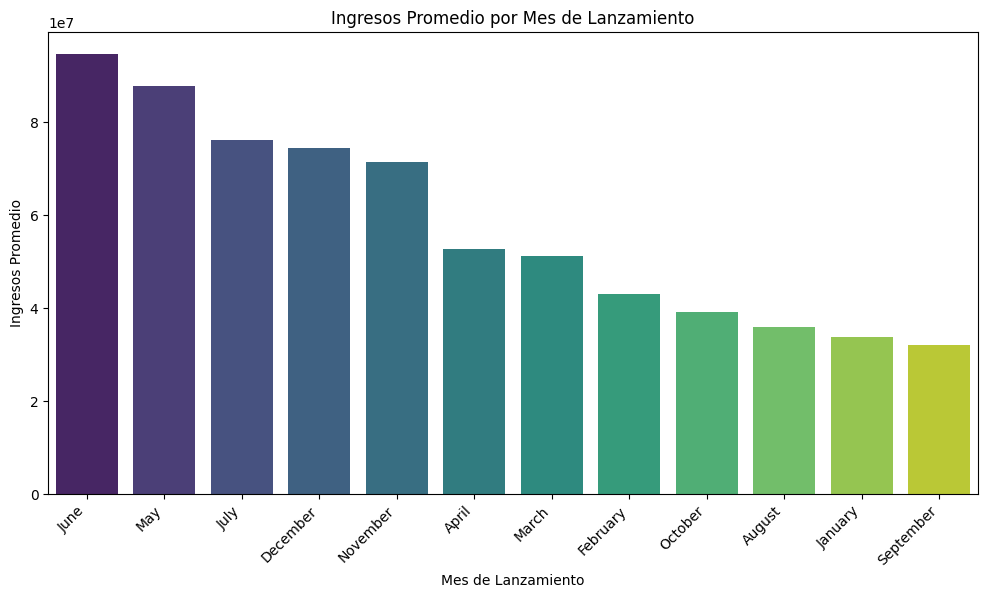

C:\Users\inmar\AppData\Local\Temp\ipykernel_27612\2950407966.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values, palette="coolwarm")


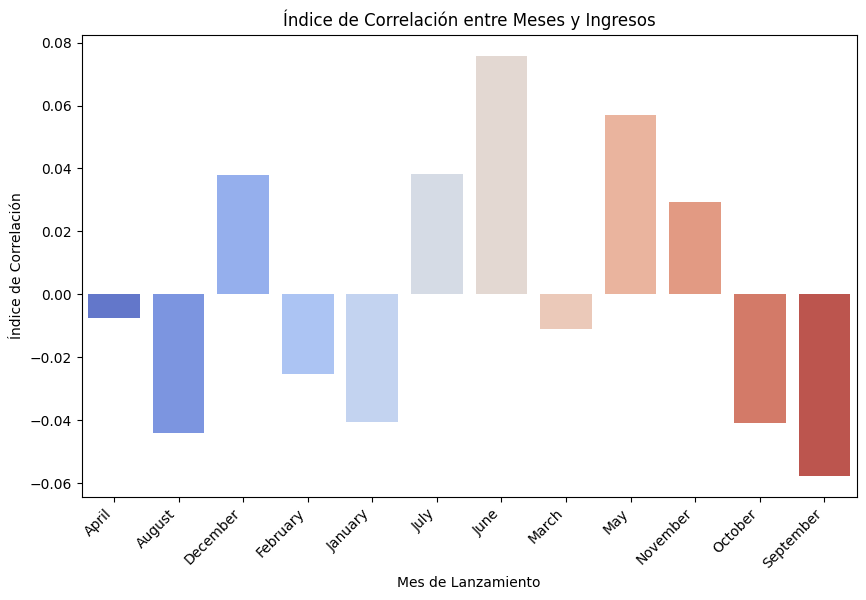

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Eliminar filas con valores nulos en 'releaseDate' y 'revenue'
moviesdf_clean = moviesdf.dropna(subset=['releaseDate', 'revenue'])

# Convertir la columna 'releaseDate' a tipo datetime
moviesdf_clean['releaseDate'] = pd.to_datetime(moviesdf_clean['releaseDate'])

# Crear una nueva columna 'month' que contiene el mes de lanzamiento
moviesdf_clean['month'] = moviesdf_clean['releaseDate'].dt.month_name()

# Calcular ingresos promedio por mes
average_revenue_by_month = moviesdf_clean.groupby('month')['revenue'].mean().sort_values(ascending=False)

# Visualizar un diagrama de correlación
plt.figure(figsize=(12, 6))
sns.barplot(x=average_revenue_by_month.index, y=average_revenue_by_month.values, palette="viridis")
plt.title('Ingresos Promedio por Mes de Lanzamiento')
plt.xlabel('Mes de Lanzamiento')
plt.ylabel('Ingresos Promedio')
plt.xticks(rotation=45, ha='right')
plt.show()

# Calcular la correlación entre los meses y los ingresos
correlation_matrix = pd.get_dummies(moviesdf_clean['month']).corrwith(moviesdf_clean['revenue'])

# Visualizar el índice de correlación
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values, palette="coolwarm")
plt.title('Índice de Correlación entre Meses y Ingresos')
plt.xlabel('Mes de Lanzamiento')
plt.ylabel('Índice de Correlación')
plt.xticks(rotation=45, ha='right')
plt.show()


### 4.13

   releaseMonth  averageRevenue  moviesCount
0           Jan    6.946513e+07          317
1           Feb    8.299534e+07          365
2           Mar    9.710837e+07          429
3           Apr    1.019682e+08          359
4           May    1.652726e+08          371
5           Jun    1.658074e+08          468
6           Jul    1.327641e+08          465
7           Aug    7.077733e+07          464
8           Sep    6.033503e+07          571
9           Oct    8.497647e+07          490
10          Nov    1.403750e+08          411
11          Dec    1.355274e+08          513


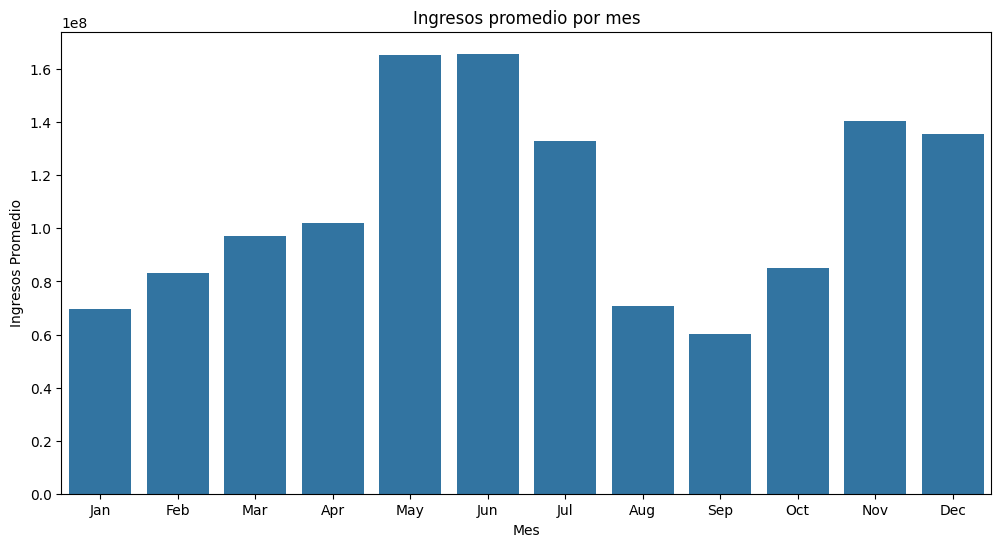

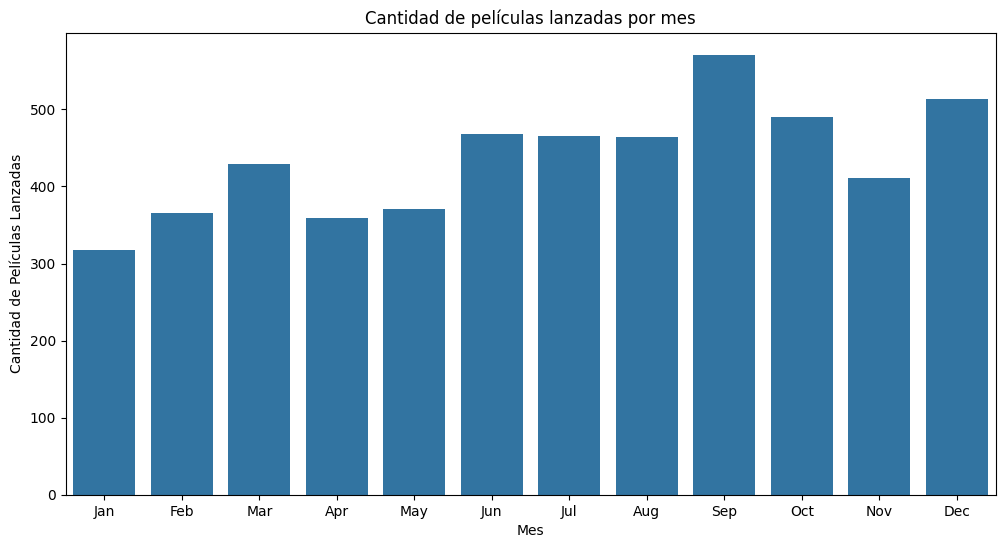

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Asegurarse de que 'releaseDate' sea de tipo datetime
moviesdf['releaseDate'] = pd.to_datetime(moviesdf['releaseDate'], errors='coerce')

# Extraer el mes de 'releaseDate'
moviesdf['releaseMonth'] = moviesdf['releaseDate'].dt.month

# Filtrar las películas con ingresos mayores a 0
moviesdf_filtered = moviesdf[moviesdf['revenue'] > 0]

# Agrupar por mes y calcular ingresos promedio y cantidad de películas lanzadas
monthly_stats = moviesdf_filtered.groupby('releaseMonth').agg({
    'revenue': 'mean',
    'popularity': 'count'  # Contar la cantidad de películas por mes usando 'popularity'
}).reset_index()

# Renombrar columnas para mayor claridad
monthly_stats = monthly_stats.rename(columns={'revenue': 'averageRevenue', 'popularity': 'moviesCount'})

# Obtener nombres de los meses
monthly_stats['releaseMonth'] = monthly_stats['releaseMonth'].apply(lambda x: calendar.month_abbr[x])

# Mostrar el resultado
print(monthly_stats)

# Gráfico de barras para ingresos promedio por mes
plt.figure(figsize=(12, 6))
sns.barplot(x='releaseMonth', y='averageRevenue', data=monthly_stats)
plt.title('Ingresos promedio por mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos Promedio')
plt.show()

# Gráfico de barras para cantidad de películas lanzadas por mes
plt.figure(figsize=(12, 6))
sns.barplot(x='releaseMonth', y='moviesCount', data=monthly_stats)
plt.title('Cantidad de películas lanzadas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Películas Lanzadas')
plt.show()



### 4.14

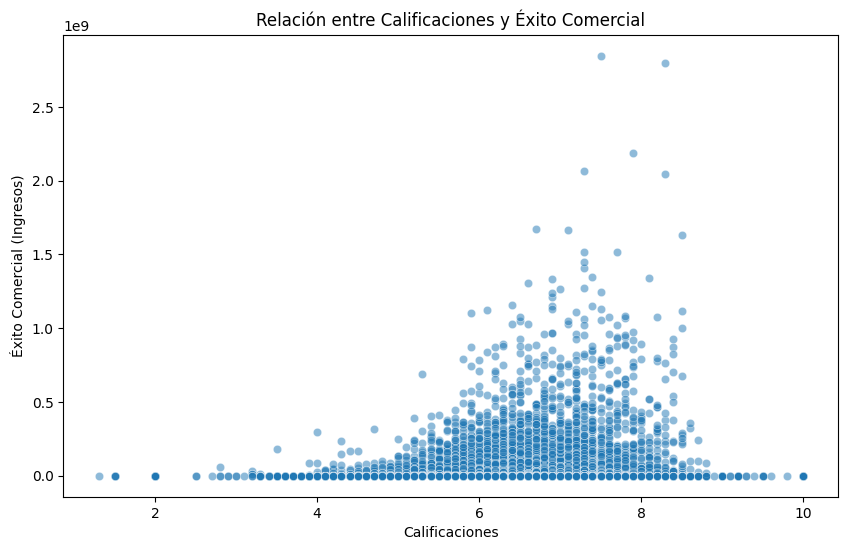

Coeficiente de Correlación: 0.14


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# Eliminar filas con valores nulos en 'voteAvg' y 'revenue'
moviesdf_clean = moviesdf.dropna(subset=['voteAvg', 'revenue'])

# Visualizar un diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='voteAvg', y='revenue', data=moviesdf_clean, alpha=0.5)
plt.title('Relación entre Calificaciones y Éxito Comercial')
plt.xlabel('Calificaciones')
plt.ylabel('Éxito Comercial (Ingresos)')
plt.show()

# Calcular el coeficiente de correlación (Pearson's r)
correlation_coefficient, _ = pearsonr(moviesdf_clean['voteAvg'], moviesdf_clean['revenue'])
print(f'Coeficiente de Correlación: {correlation_coefficient:.2f}')


### 4.15

C:\Users\inmar\AppData\Local\Temp\ipykernel_27612\3716268462.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviesdf_filtered['mainGenre'] = moviesdf_filtered['genres'].apply(lambda x: x.split('|')[0])


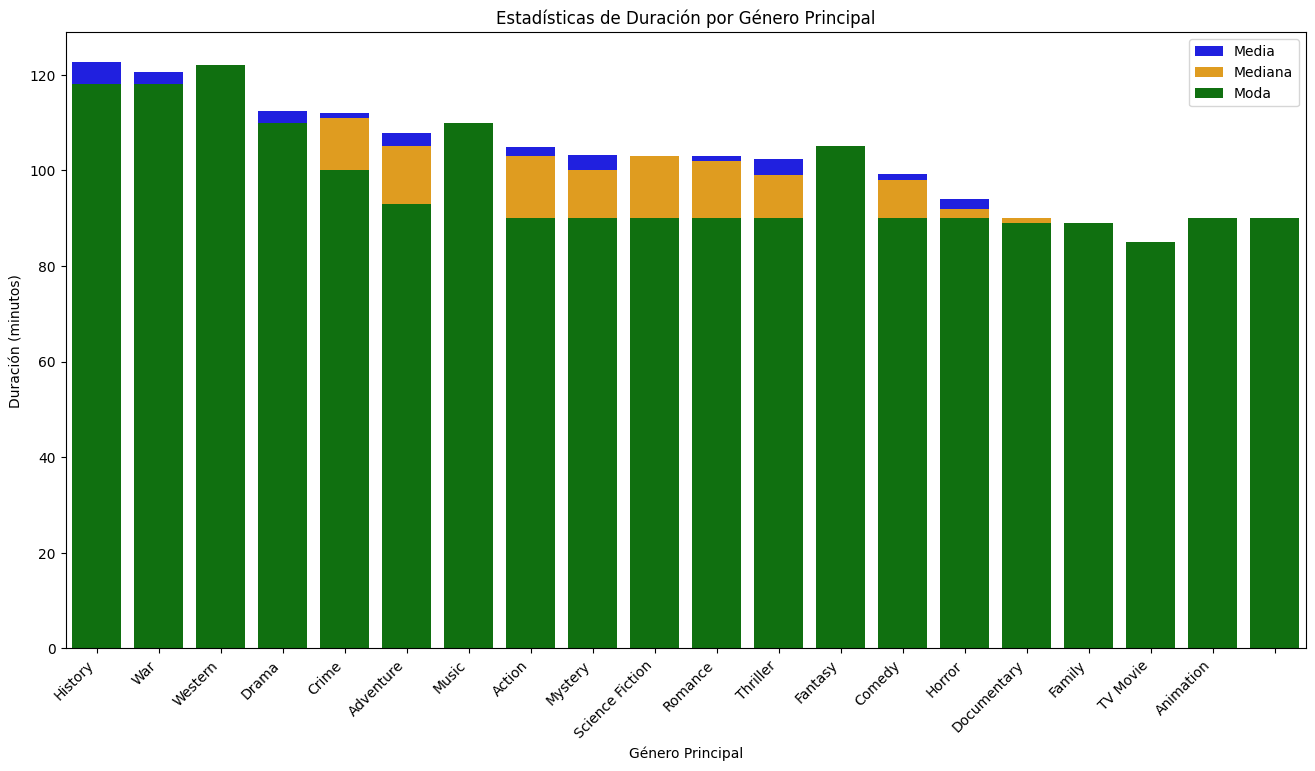

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarse de que 'runtime' sea de tipo numérico
moviesdf['runtime'] = pd.to_numeric(moviesdf['runtime'], errors='coerce')

# Filtrar películas con duración mayor a 0
moviesdf_filtered = moviesdf[moviesdf['runtime'] > 0]

# Encontrar el género principal de cada película (usando el primer género de la lista)
moviesdf_filtered['mainGenre'] = moviesdf_filtered['genres'].apply(lambda x: x.split('|')[0])

# Crear un DataFrame con estadísticas por género principal
genre_stats = moviesdf_filtered.groupby('mainGenre')['runtime'].agg(['mean', 'median', lambda x: x.mode().iat[0]]).reset_index()
genre_stats.columns = ['mainGenre', 'mean', 'median', 'mode']

# Ordenar el DataFrame por duración media
genre_stats = genre_stats.sort_values(by='mean', ascending=False)

# Gráfico de barras para mostrar la media, mediana y moda por género principal
plt.figure(figsize=(16, 8))
sns.barplot(x='mainGenre', y='mean', data=genre_stats, color='blue', label='Media')
sns.barplot(x='mainGenre', y='median', data=genre_stats, color='orange', label='Mediana')
sns.barplot(x='mainGenre', y='mode', data=genre_stats, color='green', label='Moda')

plt.title('Estadísticas de Duración por Género Principal')
plt.xlabel('Género Principal')
plt.ylabel('Duración (minutos)')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres de los géneros para mejor visibilidad
plt.legend()
plt.show()


## Ejercicio 5

Preguntas generadas de manera propia

C:\Users\inmar\AppData\Local\Temp\ipykernel_27612\377944301.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_popularity_by_country.index, y=average_popularity_by_country.values, palette="viridis")


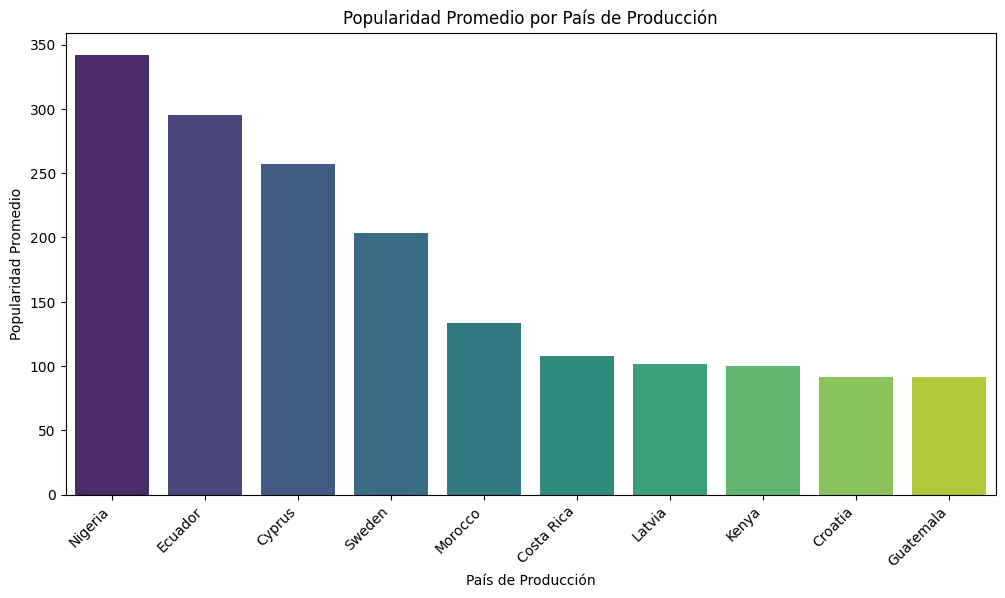

In [53]:
###Top 10 países de producción según la popularidad de la película


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que ya tienes cargado tu DataFrame llamado moviesdf

# Separar los países de producción en cada fila
production_countries_split = moviesdf['productionCountry'].str.split('|', expand=True)

# Agregar una columna 'popularity' al DataFrame resultante
production_countries_split['popularity'] = moviesdf['popularity']

# Obtener la media de la popularidad para cada país de producción
average_popularity_by_country = production_countries_split.groupby(0)['popularity'].mean().sort_values(ascending=False)

average_popularity_by_country = average_popularity_by_country.head(10)
# Visualizar un diagrama de barras para la popularidad por país de producción
plt.figure(figsize=(12, 6))
sns.barplot(x=average_popularity_by_country.index, y=average_popularity_by_country.values, palette="viridis")
plt.title('Popularidad Promedio por País de Producción')
plt.xlabel('País de Producción')
plt.ylabel('Popularidad Promedio')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\inmar\AppData\Local\Temp\ipykernel_27612\986112452.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_revenue_by_genre.index, y=average_revenue_by_genre.values, palette='viridis')


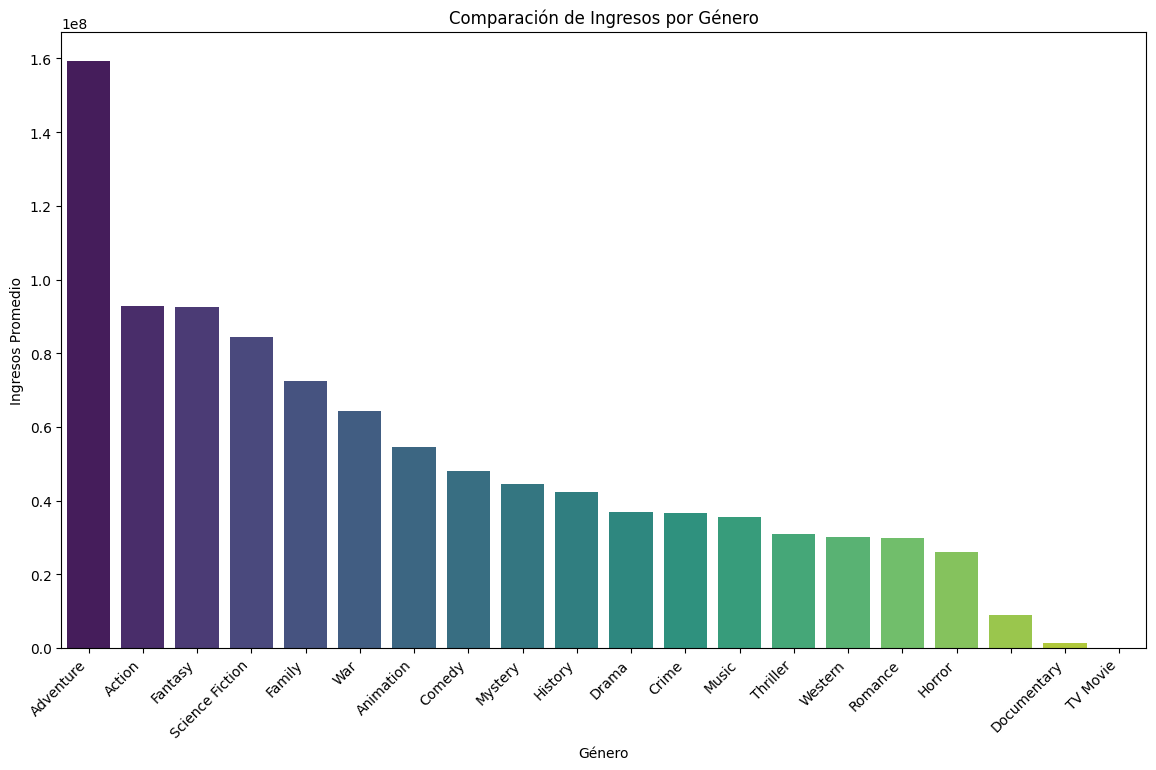

In [54]:
### 5.2 Ingresos basados en llos géneros de las películas

import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que ya tienes cargado tu DataFrame llamado moviesdf

# Eliminar filas con valores nulos en 'revenue' y 'genres'
moviesdf_clean = moviesdf.dropna(subset=['revenue', 'genres'])

# Separar los géneros en cada fila
genres_split = moviesdf_clean['genres'].str.split('|', expand=True)

# Convertir la columna 'revenue' a tipo numérico
moviesdf_clean['revenue'] = pd.to_numeric(moviesdf_clean['revenue'], errors='coerce')

# Agregar una columna 'revenue' al DataFrame resultante
genres_split['revenue'] = moviesdf_clean['revenue']

# Calcular el ingreso promedio por género
average_revenue_by_genre = genres_split.groupby(0)['revenue'].mean().sort_values(ascending=False)

# Visualizar un gráfico de barras para comparar ingresos por género
plt.figure(figsize=(14, 8))
sns.barplot(x=average_revenue_by_genre.index, y=average_revenue_by_genre.values, palette='viridis')
plt.title('Comparación de Ingresos por Género')
plt.xlabel('Género')
plt.ylabel('Ingresos Promedio')
plt.xticks(rotation=45, ha='right')
plt.show()


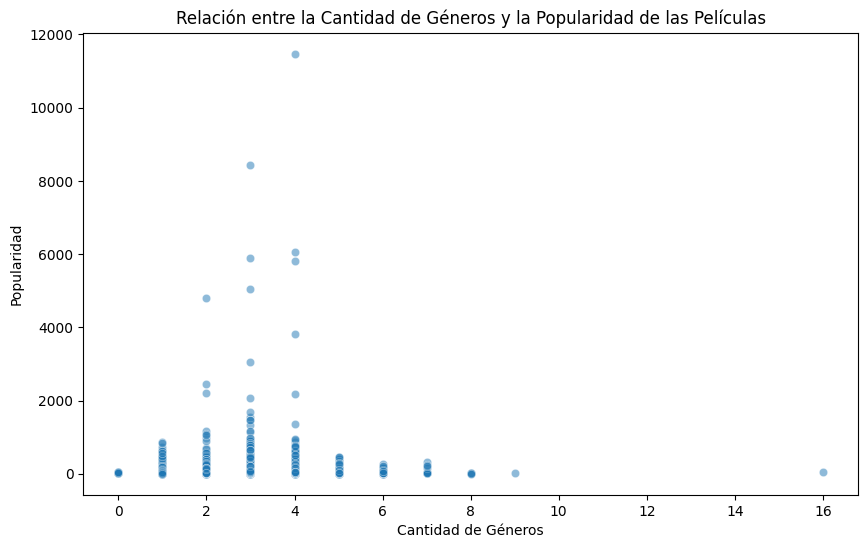

Correlación entre la Cantidad de Géneros y la Popularidad: 0.04


In [55]:
### 5.3  Relación entre la cantidad de géneros en una película y su popularidad

import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que ya tienes cargado tu DataFrame llamado moviesdf

# Eliminar filas con valores nulos en 'genresAmount' y 'popularity'
moviesdf_clean = moviesdf.dropna(subset=['genresAmount', 'popularity'])

# Calcular la correlación entre la cantidad de géneros y la popularidad
correlation = moviesdf_clean['genresAmount'].corr(moviesdf_clean['popularity'])

# Visualizar un gráfico de dispersión para mostrar la relación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='genresAmount', y='popularity', data=moviesdf_clean, alpha=0.5)
plt.title('Relación entre la Cantidad de Géneros y la Popularidad de las Películas')
plt.xlabel('Cantidad de Géneros')
plt.ylabel('Popularidad')
plt.show()

# Mostrar el valor de la correlación
print(f'Correlación entre la Cantidad de Géneros y la Popularidad: {correlation:.2f}')


C:\Users\inmar\AppData\Local\Temp\ipykernel_27612\2713524226.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='value', y='budget', data=countries_long, estimator=sum, ci=None, palette='viridis')
C:\Users\inmar\AppData\Local\Temp\ipykernel_27612\2713524226.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='value', y='budget', data=countries_long, estimator=sum, ci=None, palette='viridis')


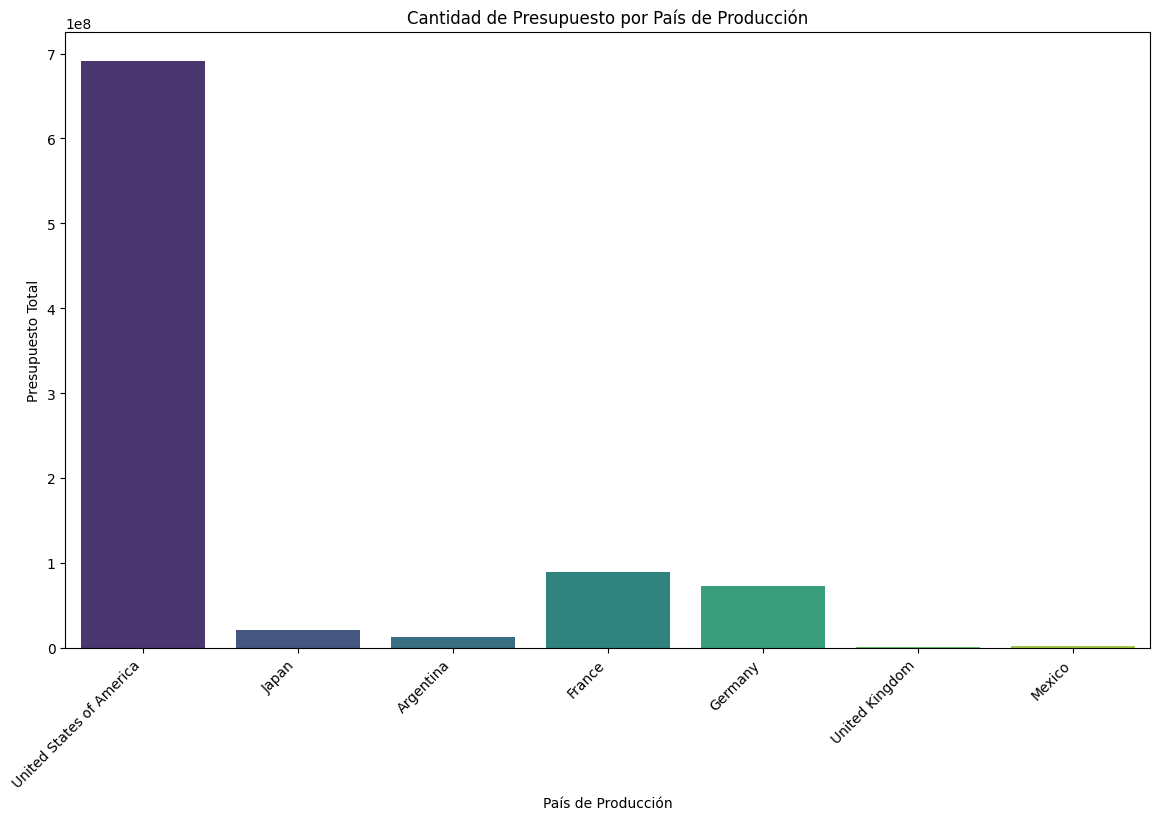

In [64]:
### 5.4 Cuáles países son los que más invierten en la producción de películas.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que ya tienes cargado tu DataFrame llamado moviesdf

# Eliminar filas con valores nulos en 'productionCountry' y 'budget'
moviesdf_clean = moviesdf.dropna(subset=['productionCountry', 'budget'])

# Eliminar filas con budget igual a 0
moviesdf_clean = moviesdf_clean[moviesdf_clean['budget'] != 0]

# Separar los países en cada fila
countries_split = moviesdf_clean['productionCountry'].str.split('|', expand=True)

# Convertir la columna 'budget' a tipo numérico
moviesdf_clean['budget'] = pd.to_numeric(moviesdf_clean['budget'], errors='coerce')

# Agregar una columna 'budget' al DataFrame resultante
countries_split['budget'] = moviesdf_clean['budget']

# Convertir los datos a formato largo (long format)
countries_long = countries_split.melt(id_vars='budget', var_name='country', value_name='value')

# Filtrar filas con valores no nulos en 'value' (país)
countries_long = countries_long.dropna(subset=['value'])
countries_long = countries_long[:20]
# Visualizar un gráfico de barras para mostrar la cantidad de presupuesto por país de producción
plt.figure(figsize=(14, 8))
sns.barplot(x='value', y='budget', data=countries_long, estimator=sum, ci=None, palette='viridis')
plt.title('Cantidad de Presupuesto por País de Producción')
plt.xlabel('País de Producción')
plt.ylabel('Presupuesto Total')
plt.xticks(rotation=45, ha='right')
plt.show()



C:\Users\inmar\AppData\Local\Temp\ipykernel_27612\1610746875.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_popularity_by_company.index, y=average_popularity_by_company.values, palette='viridis')


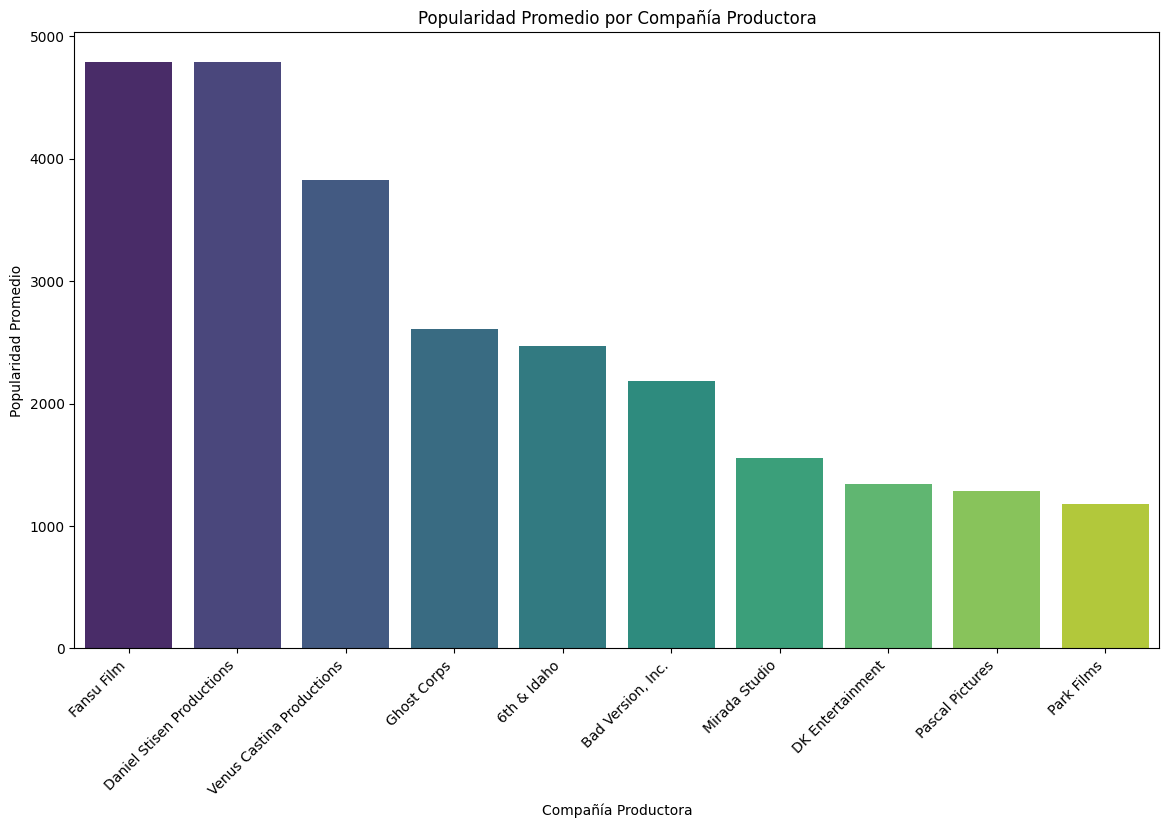

In [67]:
### 5.5 Top 10 compañías productoras populares
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que ya tienes cargado tu DataFrame llamado moviesdf

# Eliminar filas con valores nulos en 'productionCompany' y 'popularity'
moviesdf_clean = moviesdf.dropna(subset=['productionCompany', 'popularity'])

# Separar las compañías en cada fila
companies_split = moviesdf_clean['productionCompany'].str.split('|', expand=True)

# Convertir la columna 'popularity' a tipo numérico
moviesdf_clean['popularity'] = pd.to_numeric(moviesdf_clean['popularity'], errors='coerce')

# Agregar una columna 'popularity' al DataFrame resultante
companies_split['popularity'] = moviesdf_clean['popularity']

# Convertir los datos a formato largo (long format)
companies_long = companies_split.melt(id_vars='popularity', var_name='company', value_name='value')

# Filtrar filas con valores no nulos en 'value' (compañía)
companies_long = companies_long.dropna(subset=['value'])

# Calcular la popularidad promedio por compañía
average_popularity_by_company = companies_long.groupby('value')['popularity'].mean().sort_values(ascending=False)
average_popularity_by_company = average_popularity_by_company.head(10)
# Visualizar un gráfico de barras para mostrar la popularidad promedio por compañía
plt.figure(figsize=(14, 8))
sns.barplot(x=average_popularity_by_company.index, y=average_popularity_by_company.values, palette='viridis')
plt.title('Popularidad Promedio por Compañía Productora')
plt.xlabel('Compañía Productora')
plt.ylabel('Popularidad Promedio')
plt.xticks(rotation=45, ha='right')
plt.show()


In [69]:
### 5.6 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que ya tienes cargado tu DataFrame llamado moviesdf

# Eliminar filas con valores nulos en 'video' y 'revenue', y también aquellas con revenue igual a 0
moviesdf_clean = moviesdf.dropna(subset=['video', 'revenue'])
moviesdf_clean = moviesdf_clean[moviesdf_clean['revenue'] != 0]

# Convertir la columna 'revenue' a tipo numérico
moviesdf_clean['revenue'] = pd.to_numeric(moviesdf_clean['revenue'], errors='coerce')

# Filtrar películas con video promocional y con ingresos mayores a 0
video_present = moviesdf_clean[(moviesdf_clean['video'] == True) & (moviesdf_clean['revenue'] > 0)]['revenue']

# Filtrar películas sin video promocional y con ingresos mayores a 0
video_not_present = moviesdf_clean[(moviesdf_clean['video'] == False) & (moviesdf_clean['revenue'] > 0)]['revenue']

# Estadísticas descriptivas para películas con video promocional
mean_video_present = np.mean(video_present)
median_video_present = np.median(video_present)
mode_video_present = video_present.mode()[0]

# Estadísticas descriptivas para películas sin video promocional
mean_video_not_present = np.mean(video_not_present)
median_video_not_present = np.median(video_not_present)
mode_video_not_present = video_not_present.mode()[0]

# Imprimir estadísticas descriptivas
print("Estadísticas para películas con video promocional (Excluyendo $0):")
print(f'Media: {mean_video_present}')
print(f'Mediana: {median_video_present}')
print(f'Moda: {mode_video_present}')

# Imprimir quién tiene mayor media, mediana y moda
print("\nQuién tiene mayor:")
print("Media:", "Con Video" if mean_video_present > mean_video_not_present else "Sin Video")
print("Mediana:", "Con Video" if median_video_present > median_video_not_present else "Sin Video")
print("Moda:", "Con Video" if mode_video_present > mode_video_not_present else "Sin Video")

print("\nEstadísticas para películas sin video promocional (Excluyendo $0):")
print(f'Media: {mean_video_not_present}')
print(f'Mediana: {median_video_not_present}')
print(f'Moda: {mode_video_not_present}')

# Imprimir quién tiene mayor media, mediana y moda
print("\nQuién tiene mayor:")
print("Media:", "Sin Video" if mean_video_not_present > mean_video_present else "Con Video")
print("Mediana:", "Sin Video" if median_video_not_present > median_video_present else "Con Video")
print("Moda:", "Sin Video" if mode_video_not_present > mode_video_present else "Con Video")


Estadísticas para películas con video promocional (Excluyendo $0):
Media: 10632496.75
Mediana: 7253949.5
Moda: 2600000.0

Quién tiene mayor:
Media: Sin Video
Mediana: Sin Video
Moda: Con Video

Estadísticas para películas sin video promocional (Excluyendo $0):
Media: 96433076.36380255
Mediana: 38122105.0
Moda: 1000000.0

Quién tiene mayor:
Media: Sin Video
Mediana: Sin Video
Moda: Con Video
